# Problem Statement:
- A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# **As our Traget variable is Sales let as convert into categorical veriable**
- Sales: "High" if Sales>9 else "Low"

In [5]:
data["Status"]=data["Sales"].apply(lambda Sales: "High" if Sales>9 else "Low")

In [6]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Status
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [7]:
data["Status"].value_counts()

Low     287
High    113
Name: Status, dtype: int64

In [8]:
x = data.iloc[:,1:11]
y = data["Status"]

In [10]:
encoder = preprocessing.LabelEncoder()

In [16]:
x["Urban"] = encoder.fit_transform(x["Urban"])
x["US"] = encoder.fit_transform(x["US"])
x["ShelveLoc"] = encoder.fit_transform(x["ShelveLoc"])
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


**Column "ShelveLoc" is encoded as [Bad-0], [Good-1], [Medium-2]**

In [17]:
y

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Status, Length: 400, dtype: object

# Splitting Training and Testing data

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

# Building DecisionTreeClassifier witn Entropy 

In [26]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=6)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [27]:
from sklearn import tree

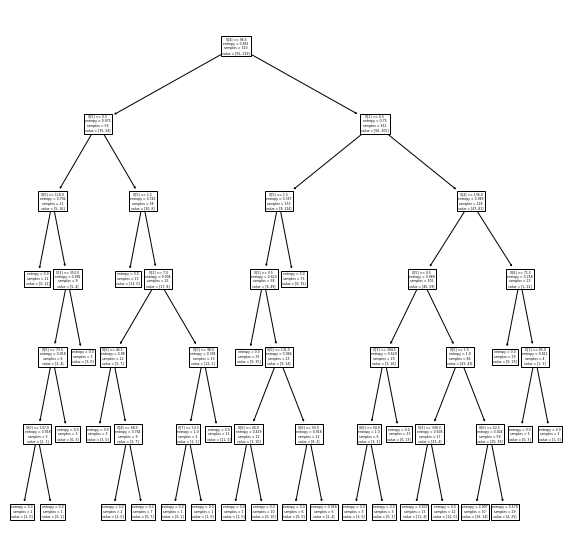

In [28]:
plt.figure(figsize=[10,10])
tree.plot_tree(model)
plt.show()

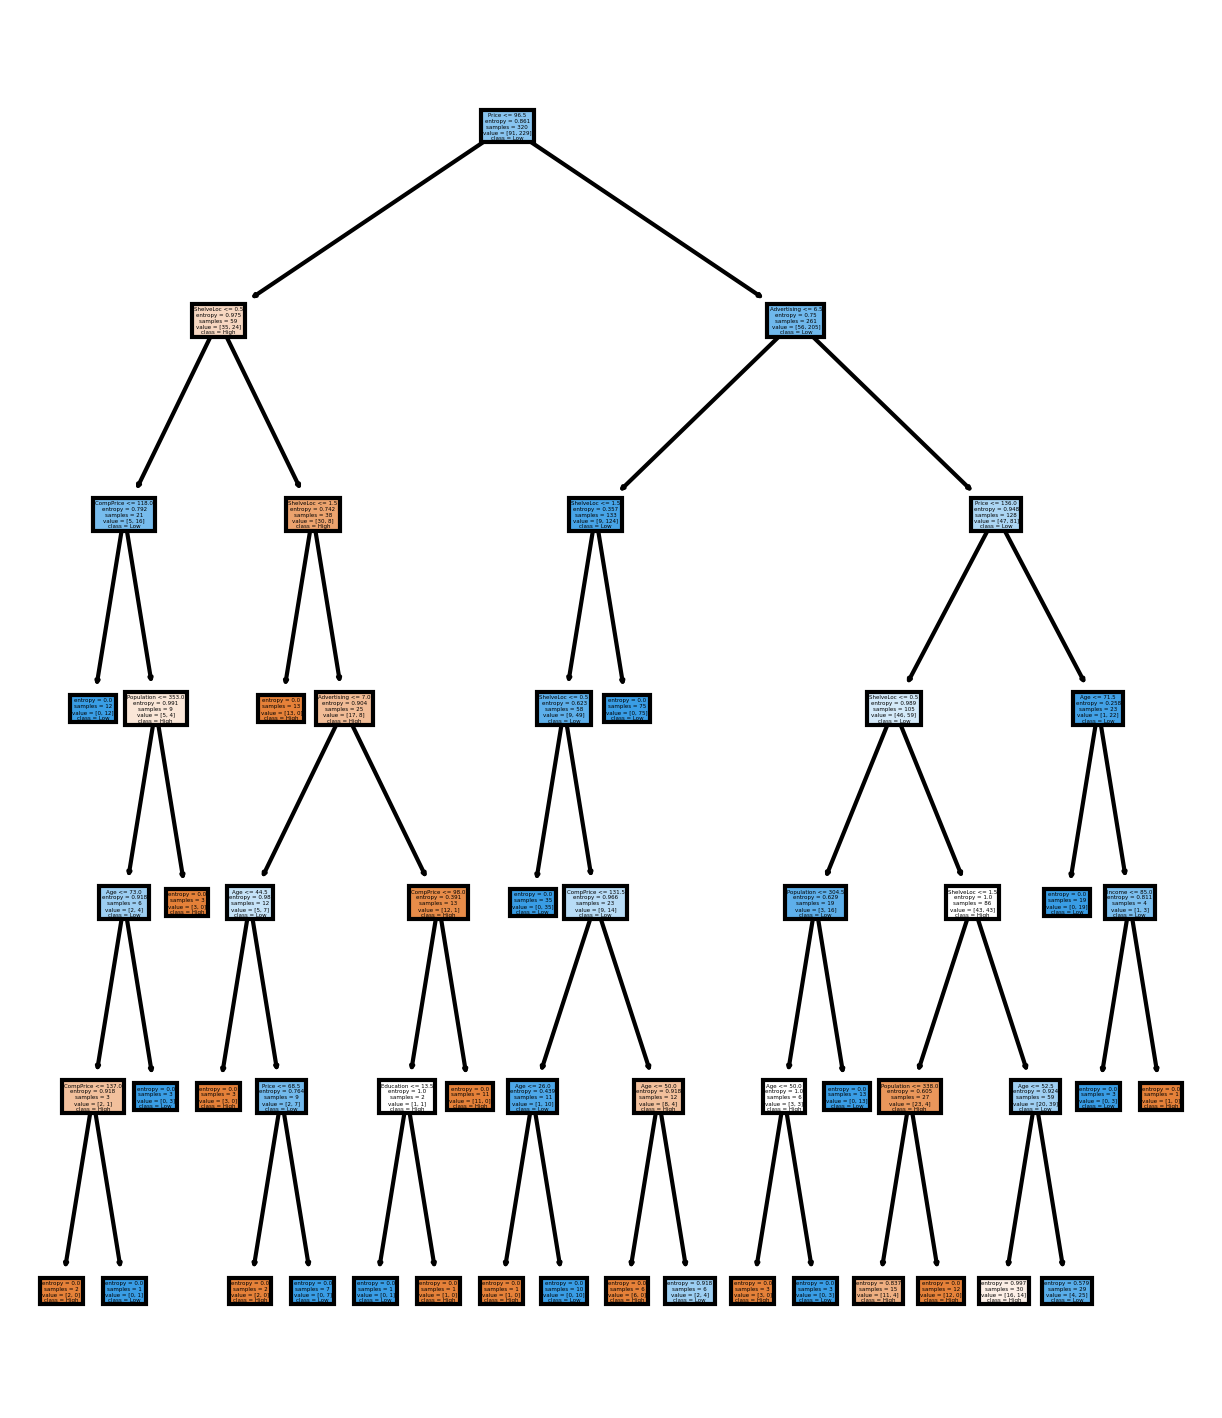

In [29]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['High', 'Low']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize= (5,6), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names = cn,
               filled = True);

In [30]:
#predicting on test data
predct = model.predict(x_test)
pd.Series(predct).value_counts()#getting the count of each category

Low     58
High    22
dtype: int64

In [31]:
predct

array(['High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low'],
      dtype=object)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predct)

array([[15,  7],
       [ 7, 51]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


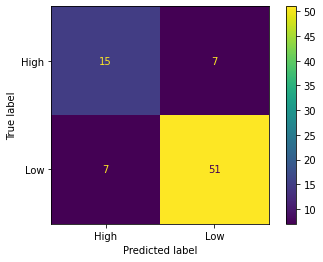

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [35]:
# Checking accuracy
np.mean(predct==y_test)

0.825

In [36]:
from sklearn.metrics import classification_report
print(classification_report(predct,y_test))

              precision    recall  f1-score   support

        High       0.68      0.68      0.68        22
         Low       0.88      0.88      0.88        58

    accuracy                           0.82        80
   macro avg       0.78      0.78      0.78        80
weighted avg       0.82      0.82      0.82        80



# Conclusion
- Our Model Performance on test data is 82%, as few poins are misclassified

# Building DecisionTreeClassifier with Gini

In [37]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=40)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=40)

In [38]:
#predicting on test data
predict = model_gini.predict(x_test)
pd.Series(predict).value_counts()#getting the count of each category

Low     64
High    16
dtype: int64

In [39]:
# Checking accuracy
np.mean(predict==y_test)

0.775

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


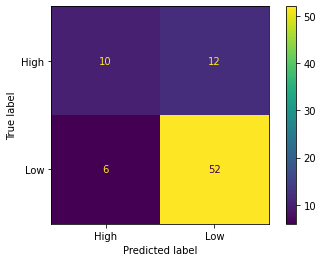

In [40]:
plot_confusion_matrix(model_gini,x_test,y_test)
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

        High       0.45      0.62      0.53        16
         Low       0.90      0.81      0.85        64

    accuracy                           0.78        80
   macro avg       0.68      0.72      0.69        80
weighted avg       0.81      0.78      0.79        80

